<a href="https://colab.research.google.com/github/iiph1/229352-StatisticalLearning/blob/main/660510773_lab05_decision_tree_bagging_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree ทำ grid search
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [ ]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

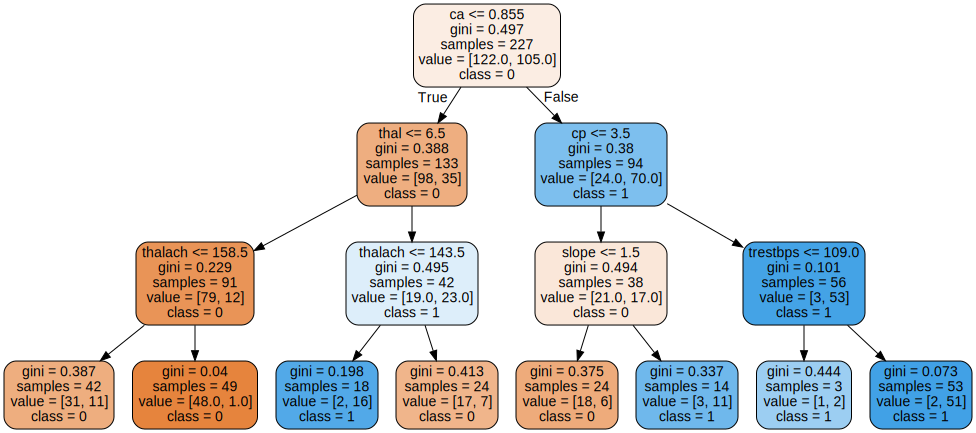

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [ ]:
data.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report
bagged_trees = BaggingClassifier(estimator=clf,n_estimators=100, max_samples=0.8)
bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.91      0.85      0.88        34

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [ ]:
forsest = RandomForestClassifier(n_estimators=200, max_depth=6)
forsest.fit(X_train, y_train)
print(classification_report(y_test, forsest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        42
           1       1.00      0.82      0.90        34

    accuracy                           0.92        76
   macro avg       0.94      0.91      0.92        76
weighted avg       0.93      0.92      0.92        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# Dicision Tree

In [ ]:
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('dt', DecisionTreeClassifier())
])

dt_params = {
    'dt__max_depth': [3, 5, 7, 10],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(dt_pipeline, dt_params, scoring='f1_macro', cv=5)
dt_grid_search.fit(X_train, y_train)

best_dt = dt_grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"Best Parameters: {dt_grid_search.best_params_}")
print(f"F1 Macro Score: {f1_dt:.4f}")
print(f"Accuracy: {accuracy_dt:.4f}")
print("-" * 30)

Decision Tree Results:
Best Parameters: {'dt__max_depth': 3, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}
F1 Macro Score: 0.7967
Accuracy: 0.8026
------------------------------


# Bagged Decision

In [ ]:
bagging_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier()))
])

bagging_params = {
    'bagging__n_estimators': [50, 100, 150],
    'bagging__max_samples': [0.6, 0.8, 1.0],
    'bagging__max_features': [0.6, 0.8, 1.0]
}

bagging_grid_search = GridSearchCV(bagging_pipeline, bagging_params, scoring='f1_macro', cv=5)
bagging_grid_search.fit(X_train, y_train)

best_bagging = bagging_grid_search.best_estimator_
y_pred_bagging = best_bagging.predict(X_test)
f1_bagging = f1_score(y_test, y_pred_bagging, average='macro')
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print("Bagged Decision Trees Results:")
print(f"Best Parameters: {bagging_grid_search.best_params_}")
print(f"F1 Macro Score: {f1_bagging:.4f}")
print(f"Accuracy: {accuracy_bagging:.4f}")
print("-" * 30)

Bagged Decision Trees Results:
Best Parameters: {'bagging__max_features': 0.8, 'bagging__max_samples': 0.8, 'bagging__n_estimators': 100}
F1 Macro Score: 0.8920
Accuracy: 0.8947
------------------------------


# Random Forest

In [ ]:
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('rf', RandomForestClassifier())
])

rf_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_params, scoring='f1_macro', cv=5)
rf_grid_search.fit(X_train, y_train)

best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"F1 Macro Score: {f1_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")
print("-" * 30)

Random Forest Results:
Best Parameters: {'rf__max_depth': 15, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
F1 Macro Score: 0.8920
Accuracy: 0.8947
------------------------------


In [ ]:
best_model = max([(f1_dt, accuracy_dt, "Decision Tree"),
                  (f1_bagging, accuracy_bagging, "Bagged Decision Trees"),
                  (f1_rf, accuracy_rf, "Random Forest")], key=lambda x: x[0])

print(f"Best Model: {best_model[2]} with F1 Macro Score: {best_model[0]:.4f} and Accuracy: {best_model[1]:.4f}")

Best Model: Bagged Decision Trees with F1 Macro Score: 0.8920 and Accuracy: 0.8947


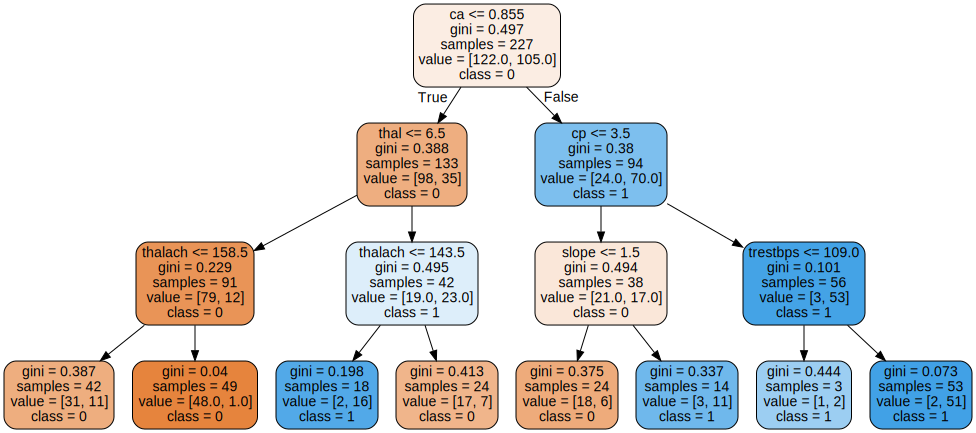

In [ ]:
# Extract the Decision Tree model from the best pipeline
best_dt_model = best_dt.named_steps['dt']

# Export and display the decision tree
plot_data = export_graphviz(best_dt_model,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
display(graph)

hyperparameters ที่เลือกใช้คือ
1. จำนวนต้นไม้ ใช้ 100 ต้น
2.ใช้ 80% ของจำนวนฟีเจอร์ทั้งหมด ในการพิจารณาเลือกจุดแบ่ง (split) ที่ดีที่สุด ณ แต่ละ node ของ decision tree
3.มีการใช้ dataset 80% ในการเทรนข้อมูล